<a href="https://colab.research.google.com/github/safwanshamsir99/Object-Detection-YOLOv8-OCR-PyTesseract/blob/main/Object_Detection__YOLOv8_OCR_PyTesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scene Text Detection and Recognition

In this exercise, we will build a scene text detection and recognition model using the 2-step **Detect then Recognize** approach. We will build the text detection model using **Ultralytics YOLOv8** and then perform Optical Character Recognition (OCR) text recognition using **PyTesseract**.


## Preparing the Training Dataset

Given a video of moving cars, we prepare the dataset for training the model using the following steps:

#### **Step 1: Extract image frame from a video**

First, we use an offline python code to extract image frames from a video. Run the python program **img.py** from any Python IDE such as Anaconda, PyCharm, Visual Studio Code etc.

In [ ]:
# img.py

# import cv2
# import time
# cpt = 0
# maxFrames = 100 # if you want 5 frames only.

# count=0
# cap=cv2.VideoCapture('mycarplate.mp4')
# while cpt < maxFrames:
#     ret, frame = cap.read()
#     if not ret:
#         break
#     count += 1
#     if count % 3 != 0:
#         continue
#     frame=cv2.resize(frame,(1080,500))
#     cv2.imshow("test window", frame) # show image in window
#     cv2.imwrite(r"C:\programcode\python\ADL\stdr2\images\numberplate_%d.jpg" %cpt, frame)
#     time.sleep(0.01)
#     cpt += 1
#     if cv2.waitKey(5)&0xFF==27:
#         break
# cap.release()
# cv2.destroyAllWindows()

#### **Step 2: Annotate the car plate (I am using [Roboflow](https://roboflow.com/))**

This is the more time consuming step.  Using an annotation tool such as LabelMe or Roboflow, we annotate each image by drawing a bounding box to represent the location of the car plate in the image. For images without a car plate just skip it without doing any annotation.


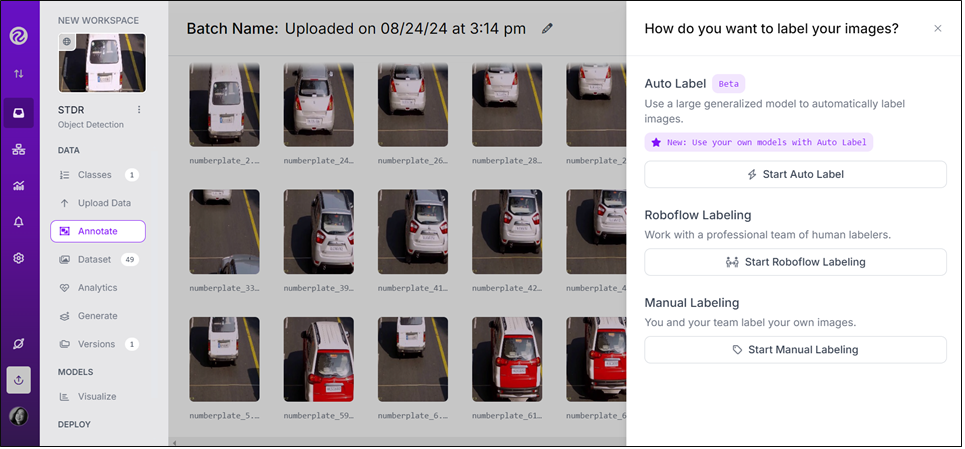

Once we are one, we will expore the dataset in the format required for YOLOv8. The exported zip will contain the following folders and files:

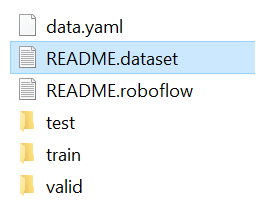


#### **Step 3: Delete all images without a label**

The image frames were captured from a video of moving cars. Therefore, it is possible that some frames does not contain a car plate and these images should not be used for training.

If you are using RoboFlow, you can skip this step as Roboflow automatically remove the images without a label.

If you are using labelme, delete all images without a complete car plate annotation by running the **imgdelete.py**



In [ ]:
# imgdelete.py

# import os

# image_directory ="images"  # Replace with the actual path to your image directory

# # Get a list of image files
# image_files = [f for f in os.listdir(image_directory) if os.path.isfile(os.path.join(image_directory, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

# # Iterate through each image file
# for image_file in image_files:
#     image_name = os.path.splitext(image_file)[0]  # Extract the image name without extension
#     txt_file = image_name + ".txt"  # Assume the corresponding text file has the same name with .txt extension

#     # Check if the corresponding text file exists
#     if not os.path.exists(os.path.join(image_directory, txt_file)):
#         # Delete the image file if the corresponding text file does not exist
#         os.remove(os.path.join(image_directory, image_file))
#         print(f"Deleted {image_file} because {txt_file} does not exist.")

## Training Scene Text Detection Model

To train, validate or run inference on models without the need to make any modifications to the code, using Ultralytics YOLO command line interface (CLI) is the easiest way to get started.

Resources and information on Ultralytics:<br>
Docs: https://docs.ultralytics.com<br>
HUB: https://hub.ultralytics.com<br>
Community: https://community.ultralytics.com<br>


#### Install YOLOv8

In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

import os

Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 36.5/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#### CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://v8docs.ultralytics.com/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

#### Inference with Pre-trained COCO Model

### 💻 CLI

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
HOME = '/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1/'

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1
100% 6.25M/6.25M [00:00<00:00, 73.8MB/s]
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
YOLOv8n summary (fused): 168 layers, 3,151,904 parameters, 0 gradients, 8.7 GFLOPs

100% 104k/104k [00:00<00:00, 29.1MB/s]
image 1/1 /content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1/dog.jpeg: 640x384 1 person, 1 car, 1 dog, 331.3ms
Speed: 14.8ms preprocess, 331.3ms inference, 28.1ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [ ]:
%cd {HOME}
!unzip '/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1/Car plate.v1i.yolov8.zip'

/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1
Archive:  /content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1/Car plate.v1i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/numberplate_19_jpg.rf.3b0d6c101a9a5f7ba54a09965464c14f.jpg  
 extracting: test/images/numberplate_1_jpg.rf.ff4bb211da571fcd49576a7284d0dd0d.jpg  
 extracting: test/images/numberplate_2_jpg.rf.59a37ed10f3ab1394ccd678f5881ae0b.jpg  
 extracting: test/images/numberplate_42_jpg.rf.e5e5e0da5da597eeecab73b7e2d18b9d.jpg  
 extracting: test/images/numberplate_60_jpg.rf.2ec780b1cc299f5b50ea83bcd57ad4e0.jpg  
   creating: test/labels/
 extracting: test/labels/numberplate_19_jpg.rf.3b0d6c101a9a5f7ba54a09965464c14f.txt  
  inflating: test/labels/numberplate_1_jpg.rf.ff4bb211da571f

## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8n.pt data='/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1/data.yaml' epochs=100 imgsz=800 plots=True

/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1
Ultralytics 8.3.1 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/gdrive/MyDrive/Western Digital/Training/Advance Practical Deep Learning (30 Sept- 2 Oct)/Day1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agno

## Perform text recognition

Off the shelf PyTeserract will be used for recognizing the text in the detection number plate. You will first need to download and install Teserract in your PC or laptop. The site to download Teserract: https://github.com/UB-Mannheim/tesseract/wiki

Additionally, you would need to install the following packages or libraries:


*   pandas
*   cvzone
*   ultralytics

Create a new txt file, **coco1.txt**, with the list of class names, in this case, only '**numberplate**'


Next, run the **stdr_app.py** program that takes the input of a video and perform automatic car plate detection recognition:

In [ ]:
# stdr_app.py

# import cv2
# import pandas as pd
# from ultralytics import YOLO
# import cvzone
# import numpy as np
# import pytesseract
# from datetime import datetime

# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# model = YOLO('best.pt')

# def RGB(event, x, y, flags, param):
#     if event == cv2.EVENT_MOUSEMOVE:
#         point = [x, y]
#         print(point)

# cv2.namedWindow('RGB')
# cv2.setMouseCallback('RGB', RGB)

# cap = cv2.VideoCapture('mycarplate.mp4')

# my_file = open("coco1.txt", "r")
# data = my_file.read()
# class_list = data.split("\n")

# area = [(27, 400), (16, 456), (1015, 451), (992, 400)]

# count = 0
# list1 = []
# processed_numbers = set()

# # Open file for writing car plate data
# with open("car_plate_data.txt", "a") as file:
#     file.write("NumberPlate\tDate\tTime\n")  # Writing column headers

# while True:
#     ret, frame = cap.read()
#     count += 1
#     if count % 3 != 0:
#         continue
#     if not ret:
#        break

#     frame = cv2.resize(frame, (1020, 500))
#     results = model.predict(frame)
#     a = results[0].boxes.data
#     px = pd.DataFrame(a).astype("float")

#     for index, row in px.iterrows():
#         x1 = int(row[0])
#         y1 = int(row[1])
#         x2 = int(row[2])
#         y2 = int(row[3])

#         d = int(row[5])
#         c = class_list[d]
#         cx = int(x1 + x2) // 2
#         cy = int(y1 + y2) // 2
#         result = cv2.pointPolygonTest(np.array(area, np.int32), ((cx, cy)), False)
#         if result >= 0:
#            crop = frame[y1:y2, x1:x2]
#            gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
#            gray = cv2.bilateralFilter(gray, 10, 20, 20)

#            text = pytesseract.image_to_string(gray).strip()
#            text = text.replace('(', '').replace(')', '').replace(',', '').replace(']','')
#            if text not in processed_numbers:
#               processed_numbers.add(text)
#               list1.append(text)
#               current_datetime = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
#               with open("car_plate_data.txt", "a") as file:
#                    file.write(f"{text}\t{current_datetime}\n")
#                    cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 1)
#                    cv2.imshow('crop', crop)


#     cv2.polylines(frame, [np.array(area, np.int32)], True, (255, 0, 0), 2)
#     cv2.imshow("RGB", frame)
#     if cv2.waitKey(1) & 0xFF == 27:
#         break

# cap.release()
# cv2.destroyAllWindows()
